### Configuration

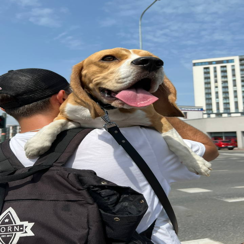

In [20]:
import requests, io, cv2
from PIL import Image
import numpy as np

img = Image.open(io.BytesIO(requests.get("https://media.roboflow.com/notebooks/examples/dog.jpeg").content)).resize((244, 244))
img_array = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

display(img)

In [21]:
!pip install torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0

In [22]:
import torch, torchvision
import onnxruntime

model = torchvision.models.resnet18(torchvision.models.ResNet18_Weights.IMAGENET1K_V1)
torch.onnx.export(model, torch.randn(1, 3, 224, 224, requires_grad=False), "resnet18.onnx", opset_version=16)

In [23]:
print(f"Input shape: {onnxruntime.InferenceSession('resnet18.onnx').get_inputs()[0].shape}")

Input shape: [1, 3, 224, 224]
